In [1]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет)
# и метрику качества

# Мой выбор - регрессия и метрика R2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")
data = pd.read_csv("Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
data.shape

(800, 13)

In [3]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [4]:
categorical = list(data.dtypes[data.dtypes == "object"].index)

a = data[categorical]
a = pd.get_dummies(a)

def change(a):
    if np.isnan(a)==True:
            return 0
    else:
        return a
    
data = data.drop(columns=categorical)

data = data.join(a)

In [5]:
data.dtypes

#                 int64
Total             int64
HP                int64
Attack            int64
Defense           int64
                  ...  
Type 2_Poison     uint8
Type 2_Psychic    uint8
Type 2_Rock       uint8
Type 2_Steel      uint8
Type 2_Water      uint8
Length: 846, dtype: object

In [6]:
y = data["Speed"]
X = data.drop(columns=["Speed","Legendary"])

from sklearn.model_selection import train_test_split

numeric_features = data.select_dtypes(include=np.number).columns.tolist()
X_nf = data[numeric_features]
numeric_features = X_nf.columns
X_nf = X_nf.fillna(method='ffill')
X_nf.isna().mean()

X_train, X_test, y_train, y_test = train_test_split(X_nf, y, test_size=0.3, random_state=10)

In [7]:
for i in list(X_train.columns):
    X_test[i] = X_test[i].agg(change)
    X_train[i] = X_train[i].agg(change)
    y_train = y_train.agg(change)
    y_test = y_test.agg(change)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc  = sc.transform(X_test)

<AxesSubplot:xlabel='Speed', ylabel='Density'>

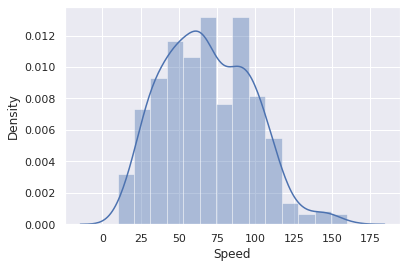

In [9]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов
sns.distplot(y_train)

In [10]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества
# метрика р2 используется в реализации лин регрессии и поэтому очень удобна для сравнения
def r2(real, predicted):
    Sum1 = np.sum((predicted - real) ** 2)
    Sum2 = np.sum((real - np.mean(real)) ** 2)

    r2 = 1 - Sum1 / Sum2

    return r2

In [11]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!
def predict_y(x, weight, bias):
    return weight*x + bias

def cost_function(x, y, weight, bias):
    companies = len(x)
    total_error = 0.0
    for i in range(companies):
        total_error += (y[i] - (weight*x[i] + bias))**2
    return total_error / companies

In [12]:
def update_weights(x, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(x)

    for i in range(companies):
        # Вычисление частных производных
        # -2x(y - (mx + b))
        weight_deriv += -2*x[i] * (y[i] - (weight*x[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*x[i] + bias))

    # Мы вычитаем, потому что производные указывают в направлении самого крутого подъема
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

In [13]:
def train(x, y, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(x, y, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={}    weight={}    bias={}    cost={}".format(i, weight, bias, cost))
            

    return weight, bias, cost_history, score

In [14]:
x = X_train_sc
y = y_train.values
for i in range(len(x)):
    for k in range(len(x[i])):
        if np.isnan(x[i][k])==True:
            x[i][k]=0
for i in range(len(y)):
    if np.isnan(y[i])==True:
            y[i]=0
weight = 0 # веса
bias = 0 # сдвиг
lr = 0.01 # качество обучения
iters = 100 # итерации
score = [] # оценка
weight, bias, cost_history, score = train(x,y,weight,bias,lr,iters)

iter=0    weight=[ 1.74316705e-02  3.31759965e-01  1.32819292e-01  2.02162802e-01
  6.93132716e-03  2.74054002e-01  1.75160767e-01  5.74852244e-01
  5.12717529e-04 -7.12981175e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.93952310e-02  6.47725271e-02  0.00000000e+00
 -7.12981175e-03  5.20838791e-02  6.90020764e-02 -1.55889104e-02
 -1.55889104e-02  1.40179350e-02  4.36247804e-02  6.90020764e-02
 -2.90026241e-03  9.78838563e-03  9.78838563e-03 -1.89725499e-02
  3.93952310e-02 -3.25071078e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.78838563e-03  0.00000000e+00  4.36247804e-02
  1.32928694e-03  3.51656817e-02 -2.40480091e-02 -1.98184598e-02
 -3.33530177e-02 -3.25071078e-02  1.40179350e-02 -1.55889104e-02
 -1.55889104e-02 -8.82163149e-03 -3.41989276e-02 -9.66754136e-03
  3.93952310e-02 -1.55889104e-02  0.00000000e+00 -1.55889104e-02
  0.00000000e+00 -2.90026241e-03  0.00000000e+00 -3.62532801e-04
 -7.12981175e-03  2.50147633e-02 -3.25071078e-02  0.00000000e+00
 -1.5588

iter=20    weight=[ 3.01344939e-01  5.73520398e+00  2.29607492e+00  3.49483069e+00
  1.19823304e-01  4.73762891e+00  3.02804085e+00  9.93759110e+00
  8.86345528e-03 -1.23254549e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.81033608e-01  1.11973624e+00  0.00000000e+00
 -1.23254549e-01  9.00384923e-01  1.19285334e+00 -2.69488759e-01
 -2.69488759e-01  2.42330977e-01  7.54150713e-01  1.19285334e+00
 -5.01374435e-02  1.69213872e-01  1.69213872e-01 -3.27982443e-01
  6.81033608e-01 -5.61957179e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.69213872e-01  0.00000000e+00  7.54150713e-01
  2.29796616e-02  6.07916503e-01 -4.15722969e-01 -3.42605864e-01
 -5.76580600e-01 -5.61957179e-01  2.42330977e-01 -2.69488759e-01
 -2.69488759e-01 -1.52501391e-01 -5.91204021e-01 -1.67124812e-01
  6.81033608e-01 -2.69488759e-01  0.00000000e+00 -2.69488759e-01
  0.00000000e+00 -5.01374435e-02  0.00000000e+00 -6.26718044e-03
 -1.23254549e-01  4.32435450e-01 -5.61957179e-01  0.00000000e+00
 -2.694

iter=40    weight=[ 4.90887700e-01  9.34258629e+00  3.74028162e+00  5.69304202e+00
  1.95190888e-01  7.71754710e+00  4.93264633e+00  1.61882302e+01
  1.44384744e-02 -2.00780349e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.10939650e+00  1.82403842e+00  0.00000000e+00
 -2.00780349e-01  1.46671746e+00  1.94314541e+00 -4.38994322e-01
 -4.38994322e-01  3.94754584e-01  1.22850349e+00  1.94314541e+00
 -8.16733622e-02  2.75647597e-01  2.75647597e-01 -5.34279911e-01
  1.10939650e+00 -9.15422268e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.75647597e-01  0.00000000e+00  1.22850349e+00
  3.74336243e-02  9.90289516e-01 -6.77208295e-01 -5.58101308e-01
 -9.39243665e-01 -9.15422268e-01  3.94754584e-01 -4.38994322e-01
 -4.38994322e-01 -2.48423143e-01 -9.63065062e-01 -2.72244541e-01
  1.10939650e+00 -4.38994322e-01  0.00000000e+00 -4.38994322e-01
  0.00000000e+00 -8.16733622e-02  0.00000000e+00 -1.02091703e-02
 -2.00780349e-01  7.04432749e-01 -9.15422268e-01  0.00000000e+00
 -4.389

iter=60    weight=[ 6.17427958e-01  1.17509035e+01  4.70444553e+00  7.16058542e+00
  2.45506887e-01  9.70696424e+00  6.20417614e+00  2.03612067e+01
  1.81604016e-02 -2.52537191e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.39537499e+00  2.29423617e+00  0.00000000e+00
 -2.52537191e-01  1.84480558e+00  2.44404637e+00 -5.52157587e-01
 -5.52157587e-01  4.96513799e-01  1.54518518e+00  2.44404637e+00
 -1.02726993e-01  3.46703601e-01  3.46703601e-01 -6.72005745e-01
  1.39537499e+00 -1.15139838e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.46703601e-01  0.00000000e+00  1.54518518e+00
  4.70832051e-02  1.24556479e+00 -8.51777983e-01 -7.01967785e-01
 -1.18136042e+00 -1.15139838e+00  4.96513799e-01 -5.52157587e-01
 -5.52157587e-01 -3.12461270e-01 -1.21132246e+00 -3.42423310e-01
  1.39537499e+00 -5.52157587e-01  0.00000000e+00 -5.52157587e-01
  0.00000000e+00 -1.02726993e-01  0.00000000e+00 -1.28408741e-02
 -2.52537191e-01  8.86020314e-01 -1.15139838e+00  0.00000000e+00
 -5.521

iter=70    weight=[ 6.63919923e-01  1.26357396e+01  5.05868753e+00  7.69977333e+00
  2.63993413e-01  1.04378930e+01  6.67134698e+00  2.18943937e+01
  1.95278692e-02 -2.71553094e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.50044591e+00  2.46699082e+00  0.00000000e+00
 -2.71553094e-01  1.98371836e+00  2.62808164e+00 -5.93734731e-01
 -5.93734731e-01  5.33900998e-01  1.66153673e+00  2.62808164e+00
 -1.10462275e-01  3.72810180e-01  3.72810180e-01 -7.22607385e-01
  1.50044591e+00 -1.23809800e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.72810180e-01  0.00000000e+00  1.66153673e+00
  5.06285429e-02  1.33935509e+00 -9.15916368e-01 -7.54825549e-01
 -1.27031617e+00 -1.23809800e+00  5.33900998e-01 -5.93734731e-01
 -5.93734731e-01 -3.35989421e-01 -1.30253433e+00 -3.68207585e-01
  1.50044591e+00 -5.93734731e-01  0.00000000e+00 -5.93734731e-01
  0.00000000e+00 -1.10462275e-01  0.00000000e+00 -1.38077844e-02
 -2.71553094e-01  9.52737126e-01 -1.23809800e+00  0.00000000e+00
 -5.937

iter=80    weight=[ 7.01907243e-01  1.33587152e+01  5.34812904e+00  8.14032910e+00
  2.79098250e-01  1.10351150e+01  7.05305957e+00  2.31471191e+01
  2.06451898e-02 -2.87090471e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.58629650e+00  2.60814394e+00  0.00000000e+00
 -2.87090471e-01  2.09722022e+00  2.77845185e+00 -6.27706285e-01
 -6.27706285e-01  5.64449062e-01  1.75660441e+00  2.77845185e+00
 -1.16782565e-01  3.94141155e-01  3.94141155e-01 -7.63952610e-01
  1.58629650e+00 -1.30893791e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.94141155e-01  0.00000000e+00  1.75660441e+00
  5.35253421e-02  1.41598860e+00 -9.68322098e-01 -7.98014191e-01
 -1.34299949e+00 -1.30893791e+00  5.64449062e-01 -6.27706285e-01
 -6.27706285e-01 -3.55213634e-01 -1.37706107e+00 -3.89275215e-01
  1.58629650e+00 -6.27706285e-01  0.00000000e+00 -6.27706285e-01
  0.00000000e+00 -1.16782565e-01  0.00000000e+00 -1.45978206e-02
 -2.87090471e-01  1.00724962e+00 -1.30893791e+00  0.00000000e+00
 -6.277

In [17]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [15]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn
x = X_test_sc
y = y_test.values
for i in range(len(x)):
    for k in range(len(x[i])):
        if np.isnan(x[i][k])==True:
            x[i][k]=0
for i in range(len(y)):
    if np.isnan(y[i])==True:
            y[i]=0
predict_y (x, weight, bias)

array([[58.11507634, 60.16391636, 58.51207561, ..., 59.75182748,
        59.49368844, 59.52181846],
       [59.13408914, 40.93014446, 49.98806031, ..., 59.75182748,
        59.49368844, 59.52181846],
       [60.40338579, 53.04029714, 57.78144573, ..., 59.75182748,
        59.49368844, 59.52181846],
       ...,
       [58.76938982, 62.89463706, 60.94750856, ..., 59.75182748,
        54.5907567 , 59.52181846],
       [58.08289699, 30.83835056, 52.42349325, ..., 59.75182748,
        59.49368844, 59.52181846],
       [59.80270456, 78.92278032, 67.03609092, ..., 59.75182748,
        59.49368844, 59.52181846]])

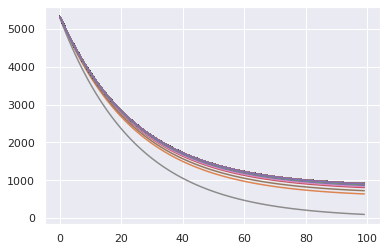

In [16]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках
plt.plot(cost_history)
plt.grid(True)
plt.show()

In [17]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на 
# обучающей и тестовой выборках и сравнить со своей моделью
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(X_train_sc, y_train)
print ("LinearRegression:", lr.score(X_test_sc, y_test))
print ("LR RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test_sc), y_test)))

LinearRegression: 0.7688672830005939
LR RMSE: 14.291562398312756


In [21]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

<AxesSubplot:xlabel='Speed', ylabel='Density'>

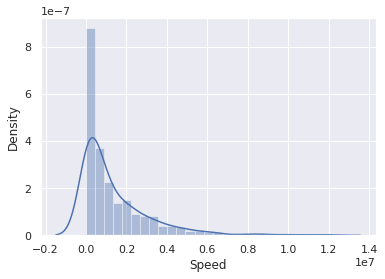

In [18]:
error = (y_train - lr.predict(X_train)) ** 2
sns.distplot(error)

<AxesSubplot:xlabel='Speed', ylabel='Density'>

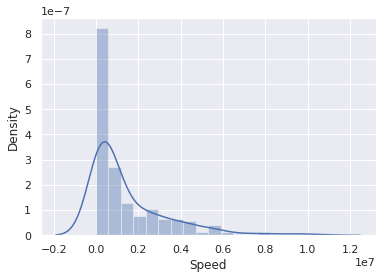

In [19]:
error = (y_test - lr.predict(X_test)) ** 2
sns.distplot(error)